In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,Softmax
from keras.utils import np_utils
from keras.datasets import mnist

<font size="5">**Loading data from keras.dataset**</font>

In [2]:
(X_train,Y_train),(x_test,y_test)=mnist.load_data()
print(X_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train,y_train=X_train[:50000,:],Y_train[:50000]
x_validation_test,y_validation_test=X_train[50000:,:],Y_train[50000:]

In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_validation_test=x_validation_test.reshape(x_validation_test.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train[0].shape)

(28, 28, 1)


<font size="5">**Convert label to one-hot coding** </font>

In [5]:
print(y_train[0])
y_train=np_utils.to_categorical(y_train,10)
y_validation_test=np_utils.to_categorical(y_validation_test,10)
y_test=np_utils.to_categorical(y_test,10)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<font size="5">**Build model** </font>


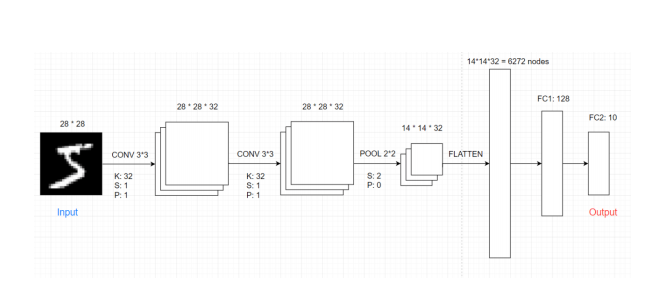

In [6]:
n_epochs=40
model=Sequential()
#add Convolutional layer with 32 kernel matrix with shape (3*3)
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

model.add(Conv2D(32,(3,3),activation='sigmoid'))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#flatren matrix into vector(for input layer in neural)
model.add(Flatten())
# add 1 hidden layer
model.add(Dense(128,activation='sigmoid'))
#output layer
model.add(Dense(10,activation='softmax'))


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

<font size="4">**this is meaning for verbose paramater fit() function**</font>

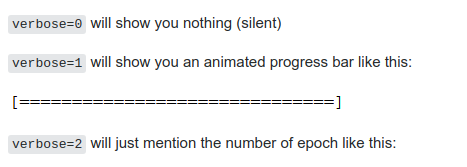

In [8]:
train=model.fit(x_train,y_train,validation_data=(x_validation_test,y_validation_test),batch_size=32,epochs=n_epochs,verbose=1)

Epoch 1/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2858 - accuracy: 0.9174 - val_loss: 0.0753 - val_accuracy: 0.9789
Epoch 2/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0591 - accuracy: 0.9830 - val_loss: 0.0591 - val_accuracy: 0.9824
Epoch 3/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0373 - accuracy: 0.9895 - val_loss: 0.0477 - val_accuracy: 0.9845
Epoch 4/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.0457 - val_accuracy: 0.9860
Epoch 5/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0172 - accuracy: 0.9950 - val_loss: 0.0425 - val_accuracy: 0.9873
Epoch 6/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0449 - val_accuracy: 0.9859
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.0413 - val_accuracy:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

<font size="5">**Visualization result after training in data**</font>

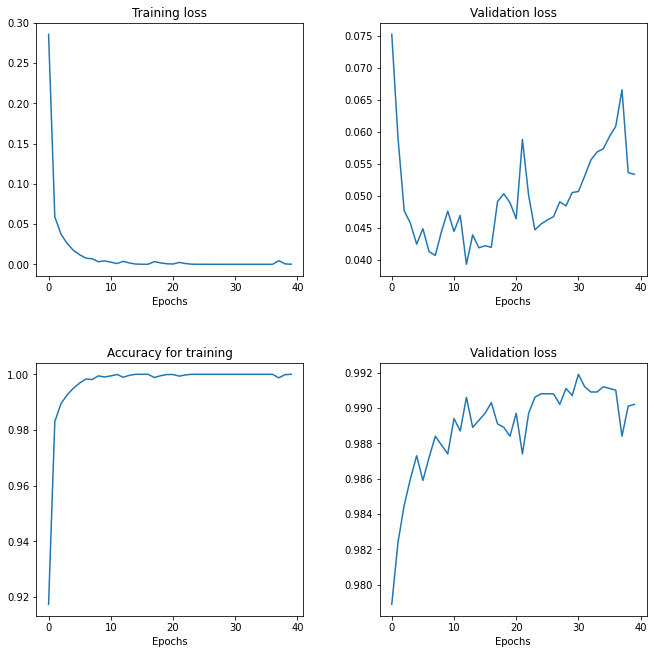

In [9]:

fig=plt.figure(figsize=(10,10))
paramater=['loss','val_loss','accuracy','val_accuracy']
labels=['Training loss','Validation loss','Accuracy for training','Validation loss']

for i in range(len(paramater)):
  plt.subplot(2,2,i+1)
  plt.plot(np.arange(0,n_epochs),train.history[paramater[i]],label=labels[i])
  plt.title(labels[i])
  plt.xlabel('Epochs')

fig.tight_layout(pad=4.0)
fig.savefig("result.png")
plt.show()



<font size="5">**Test in data test**</font>

In [10]:
accuracy_for_test=model.evaluate(x_test,y_test,verbose=0)
print(accuracy_for_test)

[0.04909054562449455, 0.9898999929428101]


<font size="5">**Build probability list, each element in list is probability array for each image in 10 class**</font>

In [11]:
probability_model=Sequential([
    model,
    Softmax()
])
predictions=probability_model(x_test)
print(predictions)

tf.Tensor(
[[0.08533674 0.08533674 0.08533674 ... 0.23196931 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.23196931 ... 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.23196931 0.08533674 ... 0.08533674 0.08533674 0.08533674]
 ...
 [0.08533674 0.08533674 0.08533674 ... 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 ... 0.08533674 0.08533674 0.08533674]
 [0.08533674 0.08533674 0.08533674 ... 0.08533674 0.08533674 0.08533674]], shape=(10000, 10), dtype=float32)


In [18]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                600810    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
_________________________________________________________________


<font size="5">**Visualization for testing data set**</font>

In [12]:
def plot_image(i,x_test,predictions,y_test):
  true_label=np.argmax(y_test[i])
  predict_label=np.argmax(predictions[i])
  plt.imshow(x_test[i])
  #plt.imshoe(x_test[i],cmap=plt.cm.binary)
  if true_label==predict_label:
    color='blue'
  else:
    color='red'
  plt.title("Predict:{} {:0.2f}%".format(predict_label,np.max(predictions[i])),color=color)

def plot_probability_histogram(predictions,i,y_test):
  true_label=np.argmax(y_test[i])
  predict_label=np.argmax(predictions[i])
  graph=plt.bar(np.arange(0,10),predictions[i],color='#777777')
  plt.ylim([0,1])
  graph[predict_label].set_color('red')
  graph[true_label].set_color('blue')



In [13]:
x_test=x_test.reshape(x_test.shape[0],28,28)

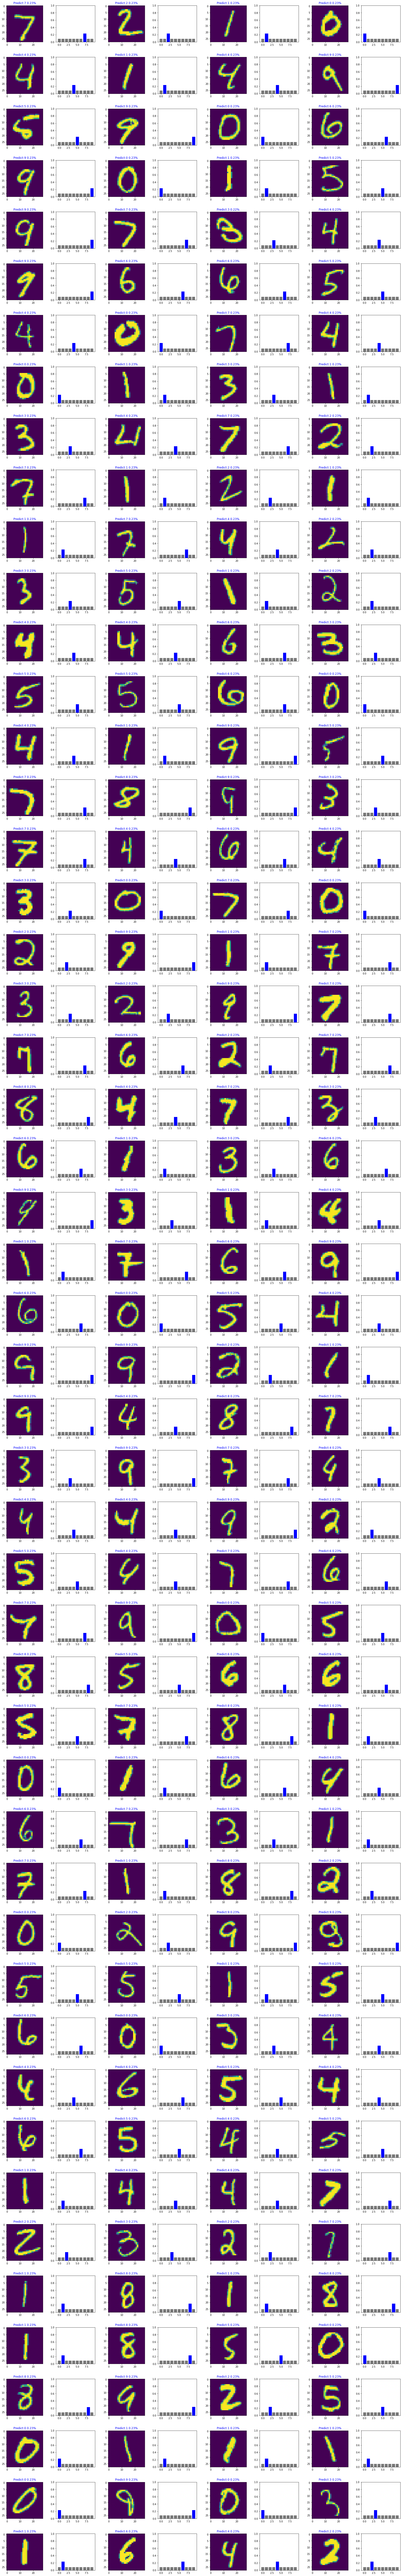

In [19]:
n_columns=4
n_rows=50
n_images=n_rows*n_columns
fig=plt.figure(figsize=(3*2*n_columns,3*n_rows))
for i in range(n_images):
  plt.subplot(n_rows,2*n_columns,2*i+1)
  plot_image(i,x_test,predictions,y_test)
  plt.subplot(n_rows,2*n_columns,2*i+2)
  plot_probability_histogram(predictions,i,y_test)
fig.tight_layout(pad=3.0)
plt.savefig("2.png")
plt.show()

In [ ]:
%cd 'drive/My Drive/Colab Notebooks'

In [ ]:
model.save("mymodel.h5")